Project Title
Job Recommendation for Fresh Graduates Using Machinee Learning
Team Members :

Manar Albaqami --- 444008744

Rawan Alharbi --- 444008757

Albatol Alqahtani --- 444008741

Fulwah Bin Aqil --- 444008754

Haya Almarri --- 444008700

Section: 62S

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle

In [139]:
df = pd.read_csv('Job_Dataset.csv')

print(f" Dataset shape:\n {df.shape}")
print("\n\n----------------------------------------------- Data Overview ------------------------------------------------")
df.head()

 Dataset shape:
 (20000, 7)


----------------------------------------------- Data Overview ------------------------------------------------


,student_id,skills,experience_years,course_grades,projects_completed,extracurriculars,job_offer
0,1,Python;Data Analysis;SQL,3,75.26,9,0,1
1,2,Java,4,74.25,6,2,1
2,3,Data Analysis,2,74.89,4,3,0
3,4,Data Analysis,4,72.73,2,3,1
4,5,Machine Learning;Python;C++,4,84.85,1,4,0


# Exploratory Data Analysis { EDA }

In [142]:
print(df.info())
print(df.describe())
print(df['skills'].value_counts())
print(df['job_offer'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          20000 non-null  int64  
 1   skills              20000 non-null  object 
 2   experience_years    20000 non-null  int64  
 3   course_grades       20000 non-null  float64
 4   projects_completed  20000 non-null  int64  
 5   extracurriculars    20000 non-null  int64  
 6   job_offer           20000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.1+ MB
None
         student_id  experience_years  course_grades  projects_completed  \
count  20000.000000      20000.000000   20000.000000        20000.000000   
mean   10000.500000          2.499100      80.092985            4.524850   
std     5773.647028          1.710861      11.519916            2.860278   
min        1.000000          0.000000      60.000000            0.000000   
25% 


--- Missing Values ---
student_id            0
skills                0
experience_years      0
course_grades         0
projects_completed    0
extracurriculars      0
job_offer             0
dtype: int64

--- Duplicate Rows ---
0

---   Job Offer   ---
job_offer
0    0.50625
1    0.49375
Name: proportion, dtype: float64


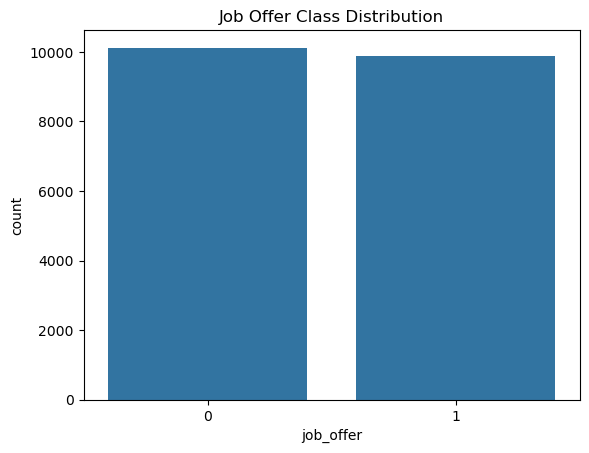

In [144]:
# Check for Missing Values
print('\n--- Missing Values ---')
print(data.isnull().sum())

# Redundancy Check (Duplicate Rows)
print('\n--- Duplicate Rows ---')
print(data.duplicated().sum())
print()

# Check class distribution
print('---   Job Offer   ---')
print(data['job_offer'].value_counts(normalize=True))
sns.countplot(x='job_offer', data=data)
plt.title('Job Offer Class Distribution')
plt.show()

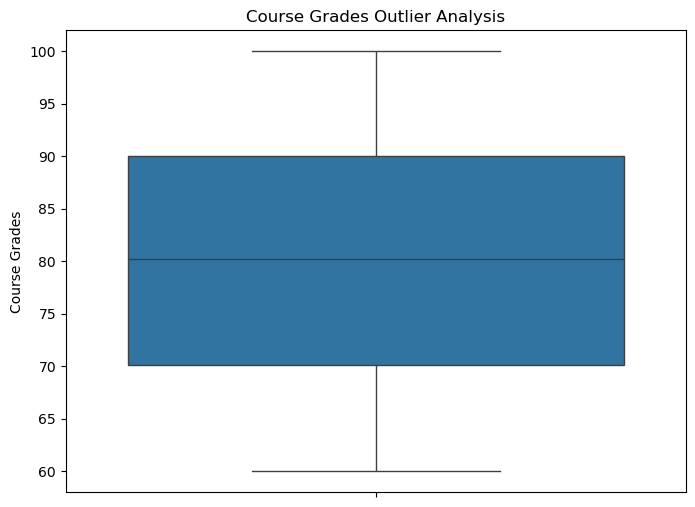


--- Course Grades Statistics ---
count    20000.000000
mean        80.092985
std         11.519916
min         60.000000
25%         70.127500
50%         80.170000
75%         90.000000
max        100.000000
Name: course_grades, dtype: float64


In [145]:
"""
Outlier analysis was conducted on the 'course_grades' feature as it is a continuous, performance-related variable 
that may significantly influence job offer outcomes. 
Identifying anomalies in this feature helps ensure data quality and supports more robust model interpretation.
"""

# Outlier Analysis: Course Grades
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['course_grades'])
plt.title('Course Grades Outlier Analysis')
plt.ylabel('Course Grades')
plt.show()

print('\n--- Course Grades Statistics ---')
print(data['course_grades'].describe())

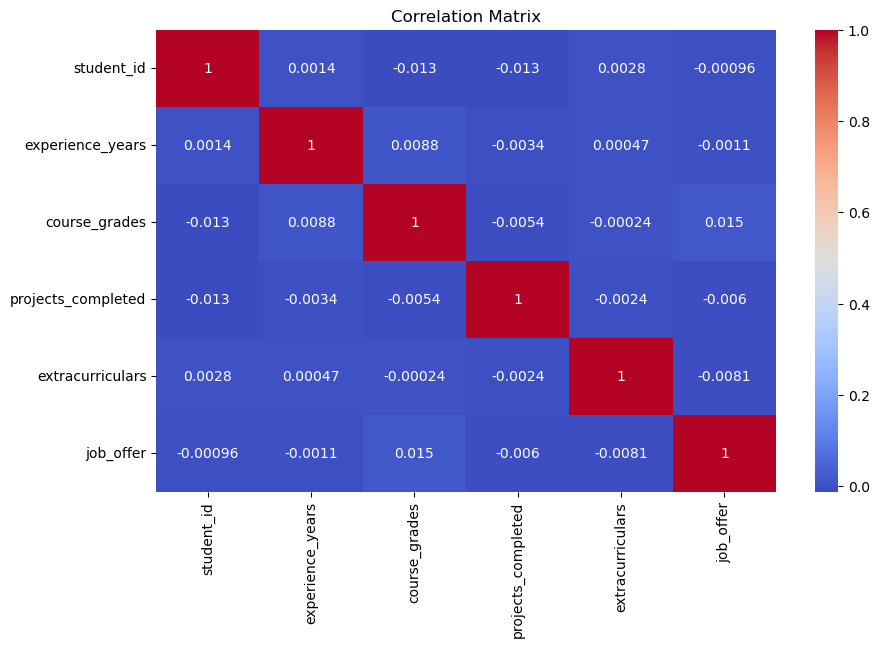

In [148]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


A correlation heatmap was used to examine the linear relationships between numerical features. 
This helps identify multicollinearity and understand how each feature relates to the target variable 'job_offer'. 
In this case, correlations are generally low, indicating limited redundancy and weak linear dependence.



# Data Preprocessing 

#### Feature Engineeerig 

In [153]:
# Import LabelEncoder to convert categorical variables into numeric format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['skills_encoded'] = le.fit_transform(df['skills'])
features = ['experience_years', 'course_grades', 'projects_completed', 'extracurriculars', 'skills_encoded']
X = df[features]
y = df['job_offer']

#### Defne Features 

In [156]:
features = ['experience_years', 'course_grades', 'projects_completed', 'extracurriculars', 'skills_encoded']
X = df[features]
y = df['job_offer']

# Apply machine learning techniques/tools 

#### Define Feature Scalers and Machine Learning Models

In [160]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42)
}

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [164]:
# Compare scalers and models using cross-validation
results = []
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        results.append({
            'Scaler': scaler_name,
            'Model': model_name,
            'CV_Mean_Accuracy': scores.mean()
        })
        print(f"{scaler_name} + {model_name}: CV Mean Accuracy = {scores.mean():.4f}")
        
# Summarize results
results_df = pd.DataFrame(results)
print("\n=== Summary Table ===")
print(results_df.pivot(index='Scaler', columns='Model', values='CV_Mean_Accuracy'))

StandardScaler + LogisticRegression: CV Mean Accuracy = 0.5028
StandardScaler + RandomForest: CV Mean Accuracy = 0.4975
StandardScaler + SVM: CV Mean Accuracy = 0.5009
StandardScaler + MLP: CV Mean Accuracy = 0.5005
MinMaxScaler + LogisticRegression: CV Mean Accuracy = 0.5028
MinMaxScaler + RandomForest: CV Mean Accuracy = 0.4981
MinMaxScaler + SVM: CV Mean Accuracy = 0.5008
MinMaxScaler + MLP: CV Mean Accuracy = 0.4997
RobustScaler + LogisticRegression: CV Mean Accuracy = 0.5037
RobustScaler + RandomForest: CV Mean Accuracy = 0.4983
RobustScaler + SVM: CV Mean Accuracy = 0.4997
RobustScaler + MLP: CV Mean Accuracy = 0.5059
MaxAbsScaler + LogisticRegression: CV Mean Accuracy = 0.5020
MaxAbsScaler + RandomForest: CV Mean Accuracy = 0.4984
MaxAbsScaler + SVM: CV Mean Accuracy = 0.5043
MaxAbsScaler + MLP: CV Mean Accuracy = 0.5044

=== Summary Table ===
Model           LogisticRegression       MLP  RandomForest       SVM
Scaler                                                              

In [165]:
# Select the best scaler for each model
best_scalers = results_df.loc[results_df.groupby('Model')['CV_Mean_Accuracy'].idxmax()]
print("\nBest scaler for each model:")
print(best_scalers[['Model', 'Scaler', 'CV_Mean_Accuracy']])


Best scaler for each model:
                 Model        Scaler  CV_Mean_Accuracy
8   LogisticRegression  RobustScaler          0.503688
11                 MLP  RobustScaler          0.505875
13        RandomForest  MaxAbsScaler          0.498437
14                 SVM  MaxAbsScaler          0.504312


In [166]:
# GridSearchCV tuning for best model+scaler combination
for idx, row in best_scalers.iterrows():
    model_name = row['Model']
    scaler_name = row['Scaler']
    scaler = scalers[scaler_name]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if model_name == 'LogisticRegression':
        param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
        grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')

    elif model_name == 'RandomForest':
        param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
        grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

    elif model_name == 'SVM':
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
        grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

    elif model_name == 'MLP':
        param_grid = {
            'hidden_layer_sizes': [(50,), (100,), (100, 50)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam'],
            'alpha': [0.0001, 0.001]
        }
        grid = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')

    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    print(f"\nBest params for {model_name} with {scaler_name}: {grid.best_params_}")
    print(f"Best CV Accuracy: {grid.best_score_:.4f}")

    y_pred = best_model.predict(X_test_scaled)
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Test Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Test Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"Test F1-score: {f1_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))



Best params for LogisticRegression with RobustScaler: {'C': 0.01, 'solver': 'lbfgs'}
Best CV Accuracy: 0.5046
Test Accuracy: 0.5080
Test Precision: 0.5060
Test Recall: 0.1489
Test F1-score: 0.2300
              precision    recall  f1-score   support

           0       0.51      0.86      0.64      2025
           1       0.51      0.15      0.23      1975

    accuracy                           0.51      4000
   macro avg       0.51      0.50      0.43      4000
weighted avg       0.51      0.51      0.44      4000


Best params for MLP with RobustScaler: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
Best CV Accuracy: 0.5096
Test Accuracy: 0.4910
Test Precision: 0.4868
Test Recall: 0.5701
Test F1-score: 0.5252
              precision    recall  f1-score   support

           0       0.50      0.41      0.45      2025
           1       0.49      0.57      0.53      1975

    accuracy                           0.49      4000
   macro avg  

In [170]:

# Re-train best model on full training data with best scaler
best_scaler = RobustScaler()
X_train_scaled = best_scaler.fit_transform(X_train)
X_test_scaled = best_scaler.transform(X_test)

best_model = MLPClassifier( activation='tanh', alpha=0.0001, hidden_layer_sizes=(100, 50),  solver='adam', max_iter=1000, random_state=42 )
best_model.fit(X_train_scaled, y_train)

# Save model and scaler
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(best_scaler, scaler_file)

print(" Best model and scaler saved successfully.")


 Best model and scaler saved successfully.
